# Evaluate GPT models

## Glue benchmarks

In [85]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, matthews_corrcoef, confusion_matrix, classification_report
from statistics import mean
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from lime.lime_text import LimeTextExplainer
import shap
from collections import defaultdict

### Task 1: Text Classification

In [86]:
df_text_cl = pd.read_csv("Text_Classification.csv", sep=";")
df_text_cl

,Sentence,Gold_Label,Label_no_ft,Label_directive,Label_legends
0,EU Directive 2022/2381 is a crucial step towar...,Supportive,Supportive,Supportive,Supportive
1,Some companies may find it difficult to quickl...,Neutral,Against,Neutral,Neutral
2,Imposing mandatory quotas on boards of directo...,Against,Against,Against,Against
3,The provision of EU Directive 2022/2381 encour...,Supportive,Supportive,Supportive,Supportive
4,"Directive 2022/2381 provides guidance, but its...",Neutral,Neutral,Neutral,Neutral
5,Gender quotas risk making women perceived as p...,Against,Against,Against,Against
6,Regulatory intervention risks generating inter...,Against,Against,Against,Against
7,The European initiative encourages greater tra...,Supportive,Supportive,Supportive,Supportive
8,The Gender Balance Directive is based on affir...,Neutral,Neutral,Supportive,Supportive


In [87]:
llms = ["_no_ft", "_directive", "_legends"]

results_text_cl = {}

print("Text classification metrics:")

for llm in llms:
    y_true = df_text_cl["Gold_Label"]
    y_pred = df_text_cl["Label"+llm]
    
    mcc = matthews_corrcoef(y_true, y_pred)
    accuracy = accuracy_score(y_true,y_pred)
    
    results_text_cl["Model"+llm] = {
        "mcc": mcc,
        "accuracy": accuracy
    }
    
    print(f"--- {"Model"+llm} ---")
    print(f"Mcc: {mcc:.3f}")
    print(f"Accuracy: {accuracy:.3f}\n")

Text classification metrics:
--- Model_no_ft ---
Mcc: 0.849
Accuracy: 0.889

--- Model_directive ---
Mcc: 0.849
Accuracy: 0.889

--- Model_legends ---
Mcc: 0.849
Accuracy: 0.889



### Task 2: Sentiment Analysis

In [88]:
df_sent_analysis = pd.read_csv("Sentiment_Analysis.csv", sep=";")
df_sent_analysis

,Sentence,Gold_Label,Label_no_ft,Label_directive,Label_legends,Unnamed: 5
0,Although compliance requires time and resource...,Positive,Positive,Positive,Positive,Label_legends è positivo (**positivo**) alla s...
1,Policies to promote equality often end up bein...,Negative,Negative,Negative,Negative,NaN
2,"Despite initial difficulties, mandatory quotas...",Positive,Positive,Positive,Positive,NaN
3,Gender equality is not a real priority; there ...,Negative,Negative,Negative,Negative,NaN
4,"Despite its noble intentions, the directive is...",Negative,Negative,Negative,Negative,NaN
5,"Although it aims for balance, the regulation r...",Negative,Negative,Negative,Negative,NaN
6,Measures to promote gender equality are essent...,Positive,Positive,Positive,Positive,NaN
7,Although women represent 60% of graduates in E...,Negative,Negative,Negative,Negative,NaN
8,The transparency mandated by EU Directive 2022...,Positive,Positive,Positive,Positive,NaN
9,"Some entrepreneurs consider this a challenge, ...",Positive,Positive,Positive,Positive,NaN


In [89]:
df_sent_analysis = df_sent_analysis.drop('Unnamed: 5', axis=1)
df_sent_analysis

,Sentence,Gold_Label,Label_no_ft,Label_directive,Label_legends
0,Although compliance requires time and resource...,Positive,Positive,Positive,Positive
1,Policies to promote equality often end up bein...,Negative,Negative,Negative,Negative
2,"Despite initial difficulties, mandatory quotas...",Positive,Positive,Positive,Positive
3,Gender equality is not a real priority; there ...,Negative,Negative,Negative,Negative
4,"Despite its noble intentions, the directive is...",Negative,Negative,Negative,Negative
5,"Although it aims for balance, the regulation r...",Negative,Negative,Negative,Negative
6,Measures to promote gender equality are essent...,Positive,Positive,Positive,Positive
7,Although women represent 60% of graduates in E...,Negative,Negative,Negative,Negative
8,The transparency mandated by EU Directive 2022...,Positive,Positive,Positive,Positive
9,"Some entrepreneurs consider this a challenge, ...",Positive,Positive,Positive,Positive


In [90]:
results_sent_analysis = {}

print("Sentiment analysis metrics:")

for llm in llms:
    y_true = df_sent_analysis["Gold_Label"]
    y_pred = df_sent_analysis["Label"+llm]
    
    accuracy = accuracy_score(y_true,y_pred)
    
    results_sent_analysis["Model"+llm] = {
        "accuracy": accuracy
    }
    
    print(f"--- {"Model"+llm} ---")
    print(f"Accuracy: {accuracy:.3f}\n")

Sentiment analysis metrics:
--- Model_no_ft ---
Accuracy: 1.000

--- Model_directive ---
Accuracy: 1.000

--- Model_legends ---
Accuracy: 1.000



### Task 3: Bias Detection

In [91]:
df_bias = pd.read_csv("Bias_Detection.csv", sep=";")
df_bias

,Sentence,Gold_Label,Label_no_ft,Label_directive,Label_legends
0,"Women perform better in support roles, while m...",Biased,Biased,Biased,Biased
1,Studies show that board diversity correlates w...,Not biased,Not biased,Not biased,Not biased
2,"Women bring empathy, men bring rationality: th...",Biased,Biased,Biased,Biased
3,Every individual should have access to the sam...,Not biased,Not biased,Not biased,Not biased
4,"Women should focus primarily on family, not ca...",Biased,Biased,Biased,Biased
5,Gender equality contributes to improving organ...,Not biased,Not biased,Not biased,Not biased
6,It is unnatural to think that men and women ca...,Biased,Biased,Biased,Biased
7,Every organization benefits from different per...,Not biased,Not biased,Not biased,Not biased
8,Men have a greater aptitude for scientific sub...,Biased,Biased,Biased,Biased
9,Recognizing the value of skills regardless of ...,Not biased,Not biased,Not biased,Not biased


In [92]:
results_bias = {}

print("Bias detection metrics:")

for llm in llms:
    y_true = df_bias["Gold_Label"]
    y_pred = df_bias["Label"+llm]
    
    mcc = accuracy_score(y_true, y_pred)
    accuracy = accuracy_score(y_true,y_pred)
    
    results_bias["Model"+llm] = {
        "mcc": mcc,
        "accuracy": accuracy
    }
    
    print(f"--- {"Model"+llm} ---")
    print(f"Mcc: {mcc:.3f}")
    print(f"Accuracy: {accuracy:.3f}\n")

Bias detection metrics:
--- Model_no_ft ---
Mcc: 1.000
Accuracy: 1.000

--- Model_directive ---
Mcc: 1.000
Accuracy: 1.000

--- Model_legends ---
Mcc: 1.000
Accuracy: 1.000



### Task 4: Reading Comprehension

In [93]:
df_read = pd.read_csv("Reading_Comprehension.csv", sep=";")
df_read

,Sentence,Gold_Label,Label_no_ft,Label_directive,Label_legends
0,"Paragraph: ""Member States must take measures t...",Yes,Yes,Yes,Yes
1,"Paragraph: ""Small and medium-sized enterprises...",No,No,No,No
2,"Paragraph: ""By June 30, 2026, at least 40% of ...",Yes,Yes,Yes,Yes
3,"Paragraph: ""Member States must ensure that pen...",No,No,No,No
4,"Paragraph: ""Listed companies must report to th...",Yes,Yes,Yes,Yes
5,"Paragraph: ""AlphaTech, listed in Milan, knew t...",Yes,Yes,Yes,Yes
6,"Paragraph: ""The SME Beta Consulting, with only...",No,No,No,No
7,"Paragraph: ""The government of one Member State...",No,No,No,No
8,"Paragraph: ""Optima Fin appointed three new fem...",Yes,Yes,Yes,Yes
9,"Paragraph: ""The Ministry required listed compa...",No,No,No,No


In [94]:
results_read = {}

print("Reading comprehension metrics:")

for llm in llms:
    y_true = df_read["Gold_Label"]
    y_pred = df_read["Label"+llm]
    
    mcc = accuracy_score(y_true, y_pred)
    accuracy = accuracy_score(y_true,y_pred)
    
    results_read["Model"+llm] = {
        "accuracy": accuracy
    }
    
    print(f"--- {"Model"+llm} ---")
    print(f"Accuracy: {accuracy:.3f}\n")

Reading comprehension metrics:
--- Model_no_ft ---
Accuracy: 1.000

--- Model_directive ---
Accuracy: 1.000

--- Model_legends ---
Accuracy: 1.000



### Macro-average

In [95]:
def normalize_mcc(mcc):
    return (mcc+1) / 2

In [96]:
macro_accuracy_average = {}
macro_average = {}

for llm in llms:
    macro_accuracy_average["Model"+llm] = mean([results_text_cl["Model"+llm]['accuracy'], results_sent_analysis["Model"+llm]['accuracy'], results_bias["Model"+llm]['accuracy'], results_read["Model"+llm]['accuracy']])
    macro_average["Model"+llm] = mean([mean([results_text_cl["Model"+llm]['accuracy'], normalize_mcc(results_text_cl["Model"+llm]['mcc'])]), results_sent_analysis["Model"+llm]['accuracy'], results_bias["Model"+llm]['accuracy'], results_read["Model"+llm]['accuracy']])

print("Macro accuracy average per model:")
for llm in macro_accuracy_average.keys():
    print(f"{llm} = {macro_accuracy_average[llm]:.3f}")

print()
print("Macro average per model:")
for llm in macro_average.keys():
    print(f"{llm} = {macro_average[llm]:.3f}")

Macro accuracy average per model:
Model_no_ft = 0.972
Model_directive = 0.972
Model_legends = 0.972

Macro average per model:
Model_no_ft = 0.977
Model_directive = 0.977
Model_legends = 0.977


### Explainability analysis (data-driven)

In [97]:
tasks = {
    "Bias Detection": "Bias_Detection.csv",
    "Text Classification": "Text_Classification.csv",
    "Reading Comprehension": "Reading_Comprehension.csv",
    "Sentiment Analysis": "Sentiment_Analysis.csv"
}

In [98]:
def analyze_task(task_name, file_path, model):
    print(f"\n=== Task: {task_name} ===")
    df = pd.read_csv(file_path, sep=";")
    y_true = df["Gold_Label"]
    y_pred = df[model]

    labels = sorted(df["Gold_Label"].unique())
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix - {task_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    print(classification_report(y_true, y_pred))

    errors = df[df["Gold_Label"] != df[model]]
    if not errors.empty:
        text = " ".join(errors["Sentence"].astype(str).tolist())
        wc = WordCloud(width=600, height=400, background_color="white").generate(text)
        plt.figure(figsize=(8,6))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Error WordCloud - {task_name}")
        plt.show()

#### Model no fine tuning


=== Task: Bias Detection ===


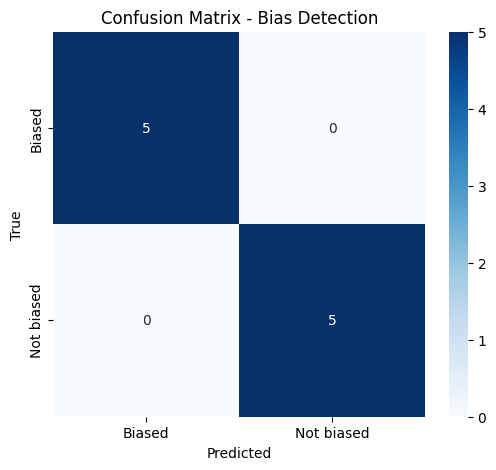

              precision    recall  f1-score   support

      Biased       1.00      1.00      1.00         5
  Not biased       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


=== Task: Text Classification ===


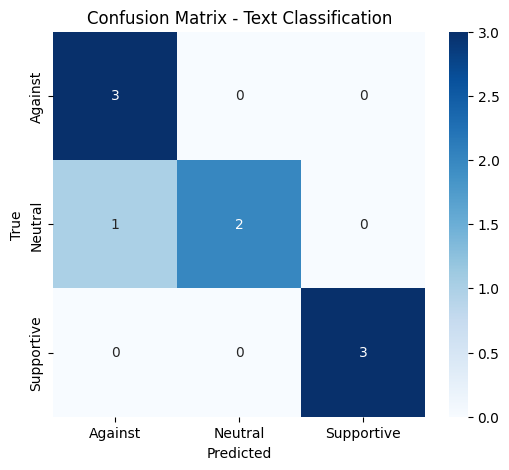

              precision    recall  f1-score   support

     Against       0.75      1.00      0.86         3
     Neutral       1.00      0.67      0.80         3
  Supportive       1.00      1.00      1.00         3

    accuracy                           0.89         9
   macro avg       0.92      0.89      0.89         9
weighted avg       0.92      0.89      0.89         9



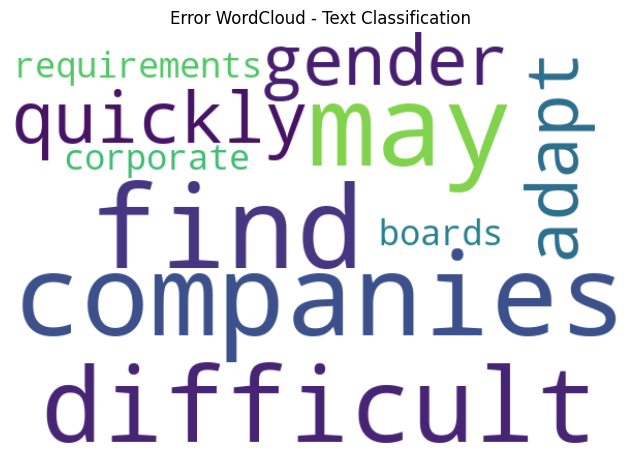


=== Task: Reading Comprehension ===


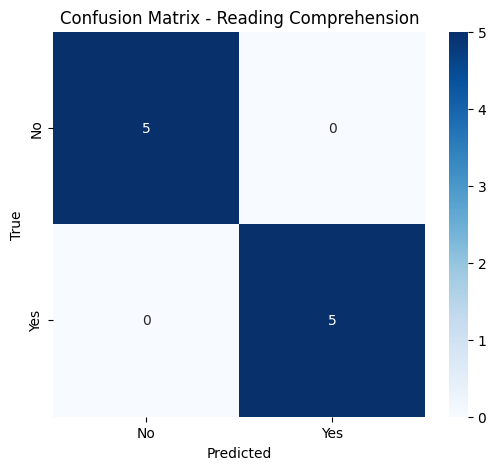

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         5
         Yes       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


=== Task: Sentiment Analysis ===


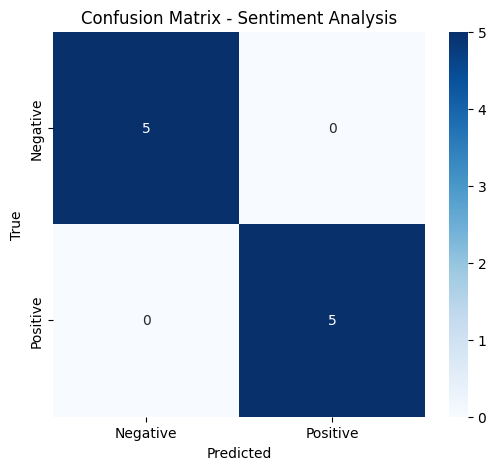

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         5
    Positive       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [99]:
for task, file in tasks.items():
    analyze_task(task, file, "Label_no_ft")

#### Model directive


=== Task: Bias Detection ===


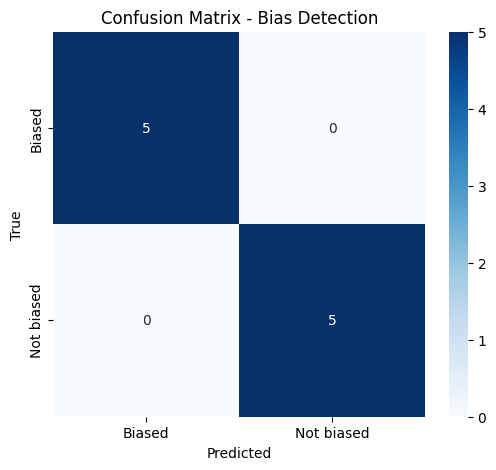

              precision    recall  f1-score   support

      Biased       1.00      1.00      1.00         5
  Not biased       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


=== Task: Text Classification ===


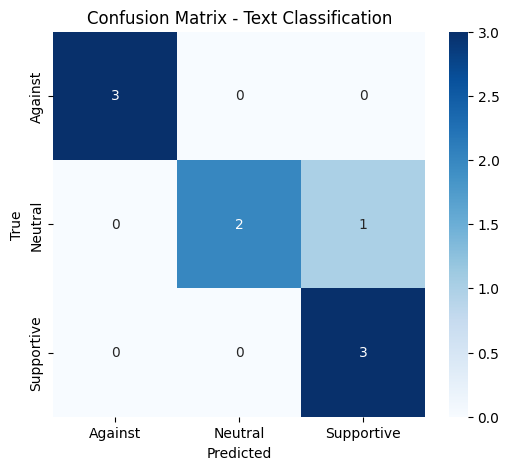

              precision    recall  f1-score   support

     Against       1.00      1.00      1.00         3
     Neutral       1.00      0.67      0.80         3
  Supportive       0.75      1.00      0.86         3

    accuracy                           0.89         9
   macro avg       0.92      0.89      0.89         9
weighted avg       0.92      0.89      0.89         9



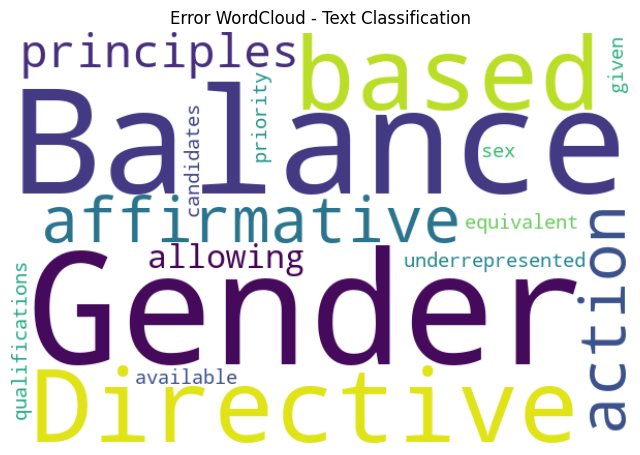


=== Task: Reading Comprehension ===


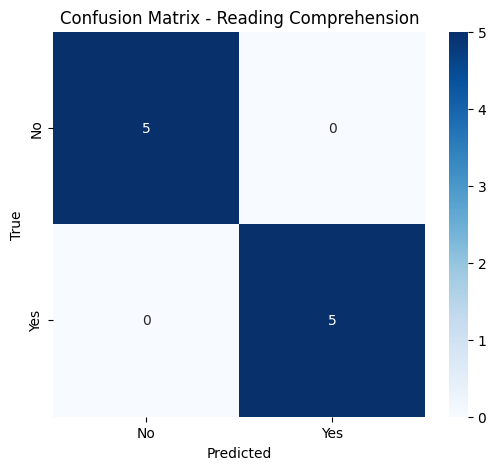

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         5
         Yes       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


=== Task: Sentiment Analysis ===


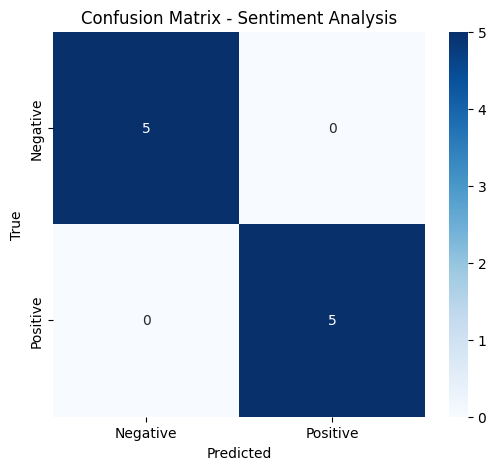

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         5
    Positive       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [100]:
for task, file in tasks.items():
    analyze_task(task, file, "Label_directive")

#### Model legends


=== Task: Bias Detection ===


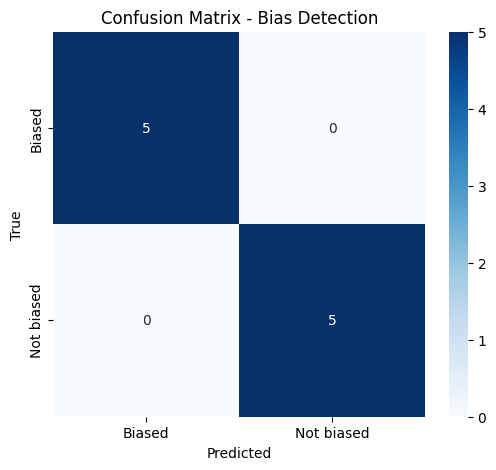

              precision    recall  f1-score   support

      Biased       1.00      1.00      1.00         5
  Not biased       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


=== Task: Text Classification ===


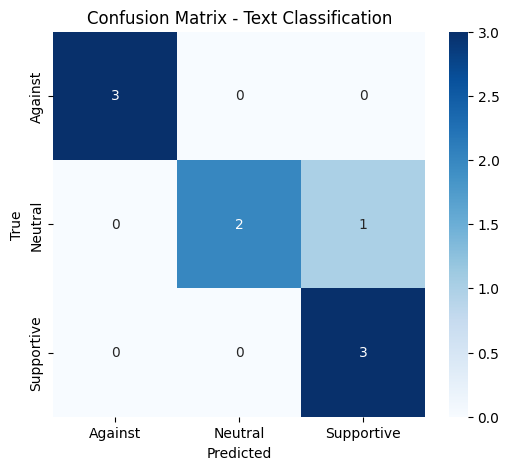

              precision    recall  f1-score   support

     Against       1.00      1.00      1.00         3
     Neutral       1.00      0.67      0.80         3
  Supportive       0.75      1.00      0.86         3

    accuracy                           0.89         9
   macro avg       0.92      0.89      0.89         9
weighted avg       0.92      0.89      0.89         9



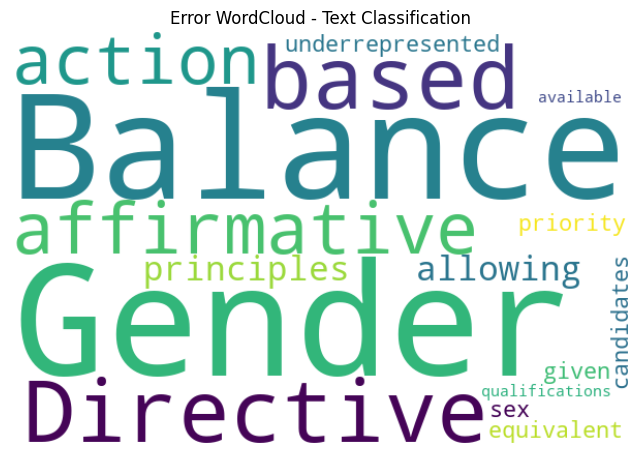


=== Task: Reading Comprehension ===


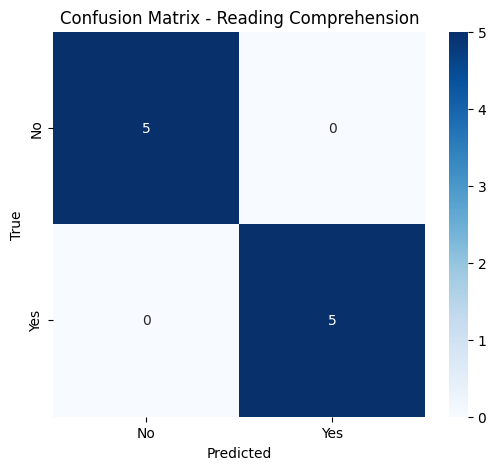

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         5
         Yes       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


=== Task: Sentiment Analysis ===


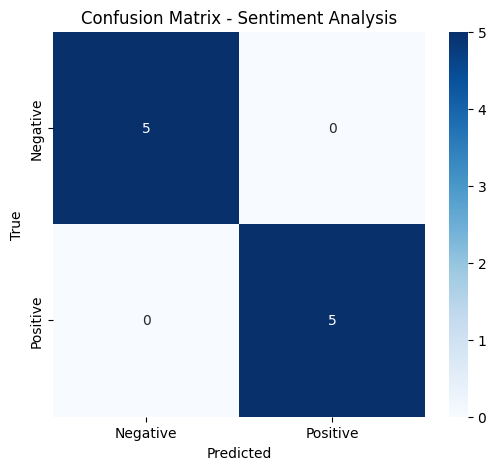

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         5
    Positive       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [101]:
for task, file in tasks.items():
    analyze_task(task, file, "Label_legends")

### LIME analysis

Premise: EU Directive 2022/2381 is a crucial step towards ensuring equal opportunities in top management positions in European companies.

Predizione: Supportive
Spiegazione:
[(np.str_('management'), -0.00010385535475667934), (np.str_('positions'), -0.0001023408341511028), (np.str_('a'), -0.00010104205416977819), (np.str_('companies'), -0.00010078896618086787), (np.str_('Premise'), -0.0001001646472136652), (np.str_('2022'), -0.00010002508382037254), (np.str_('is'), -9.474832214856128e-05), (np.str_('step'), -9.389556983859526e-05), (np.str_('2381'), -9.246878021063279e-05), (np.str_('Directive'), -9.217892907546229e-05)]


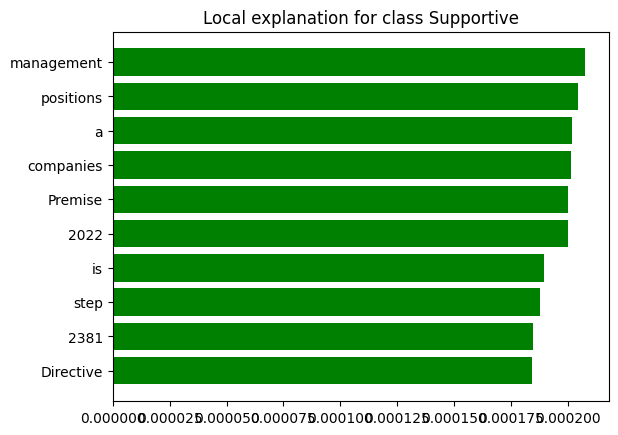

Premise: Some companies may find it difficult to quickly adapt to gender requirements on corporate boards.

Predizione: Neutral
Spiegazione:
[(np.str_('gender'), 0.00022095509326215538), (np.str_('find'), 0.00021960985998590498), (np.str_('requirements'), 0.0002158860776831341), (np.str_('companies'), 0.00020796018256775885), (np.str_('it'), 0.00020758758390705434), (np.str_('quickly'), 0.00020726395965051222), (np.str_('Some'), 0.00020642335978458565), (np.str_('corporate'), 0.00020573531151835196), (np.str_('on'), 0.00020481251770149383), (np.str_('boards'), 0.0002002015093072439)]


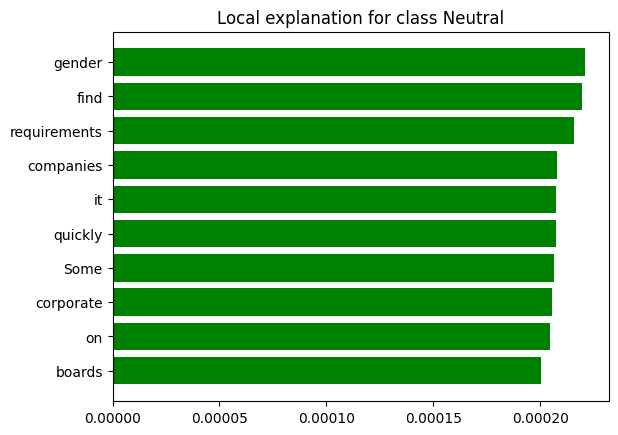

Premise: Imposing mandatory quotas on boards of directors limits companies' freedom and represents excessive intervention.

Predizione: Against
Spiegazione:
[(np.str_('Premise'), -0.00011476196302129333), (np.str_('and'), -0.00011024959023703192), (np.str_('excessive'), -0.00010499360298505986), (np.str_('represents'), -0.0001031078294104067), (np.str_('on'), -0.00010142162466544764), (np.str_('limits'), -9.996307764946153e-05), (np.str_('freedom'), -9.938465261263575e-05), (np.str_('Imposing'), -9.814087462901046e-05), (np.str_('of'), -9.714471969447908e-05), (np.str_('quotas'), -9.496475374077469e-05)]


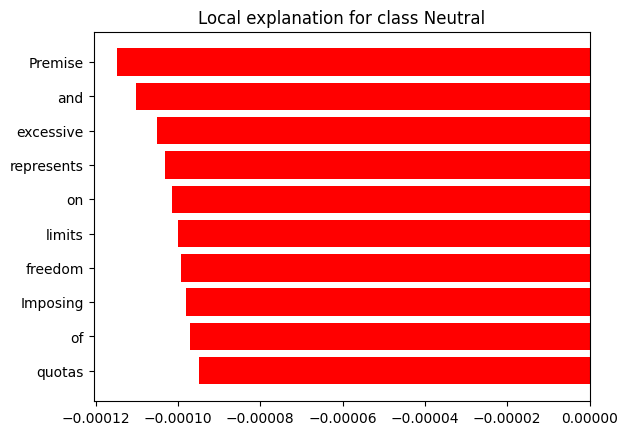

Premise: The provision of EU Directive 2022/2381 encourages greater female representation on boards, contributing to more inclusive decisions.

Predizione: Supportive
Spiegazione:
[(np.str_('greater'), -0.00010204771841384074), (np.str_('encourages'), -9.39628755364352e-05), (np.str_('2022'), -9.39015877132385e-05), (np.str_('provision'), -9.208374437278621e-05), (np.str_('Premise'), -9.189002869257868e-05), (np.str_('boards'), -9.163002274054437e-05), (np.str_('inclusive'), -9.083068896234769e-05), (np.str_('representation'), -9.019188440702231e-05), (np.str_('more'), -8.936076168155099e-05), (np.str_('Directive'), -8.811104019722982e-05)]


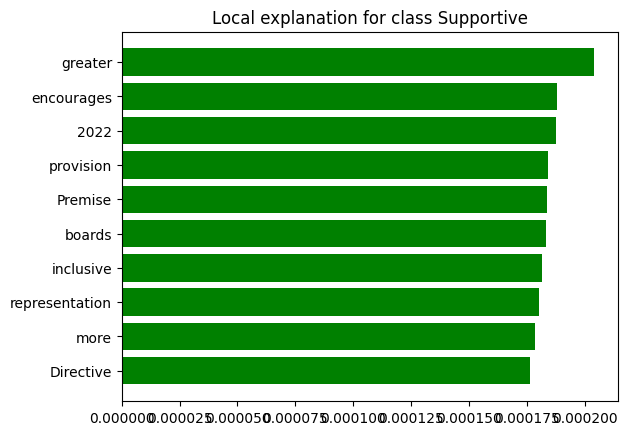

Premise: Directive 2022/2381 provides guidance, but its actual impact will depend on how individual Member States implement the rules.

Predizione: Neutral
Spiegazione:
[(np.str_('2022'), 0.00019978142319033412), (np.str_('impact'), 0.0001957546791818093), (np.str_('2381'), 0.00019516585066070485), (np.str_('Member'), 0.0001872523702414187), (np.str_('Premise'), 0.0001850170957809608), (np.str_('Directive'), 0.00018132855270490007), (np.str_('the'), 0.00017963045551755544), (np.str_('its'), 0.00017820103263999076), (np.str_('implement'), 0.0001745303599572651), (np.str_('rules'), 0.0001676266798214695)]


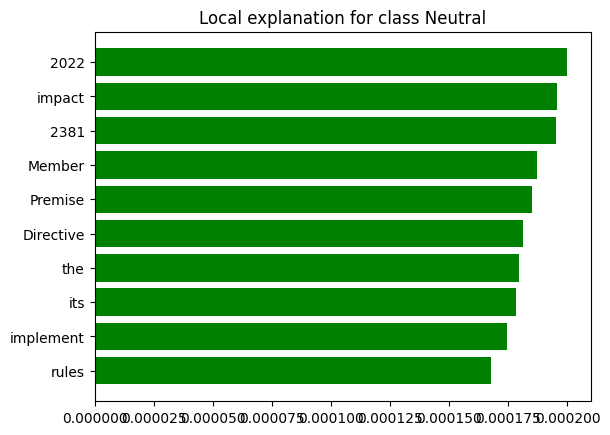

Premise: Gender quotas risk making women perceived as preferred, undermining their legitimacy in top management roles.

Predizione: Against
Spiegazione:
[(np.str_('in'), -0.00011445815746876895), (np.str_('legitimacy'), -0.00011230269369835612), (np.str_('management'), -0.00011048614498418755), (np.str_('as'), -0.00010820646513134474), (np.str_('their'), -0.0001053276390715108), (np.str_('making'), -0.00010457382058807906), (np.str_('top'), -0.00010446043173705034), (np.str_('perceived'), -0.00010428797242050496), (np.str_('undermining'), -0.00010099393301168988), (np.str_('preferred'), -9.848439605112324e-05)]


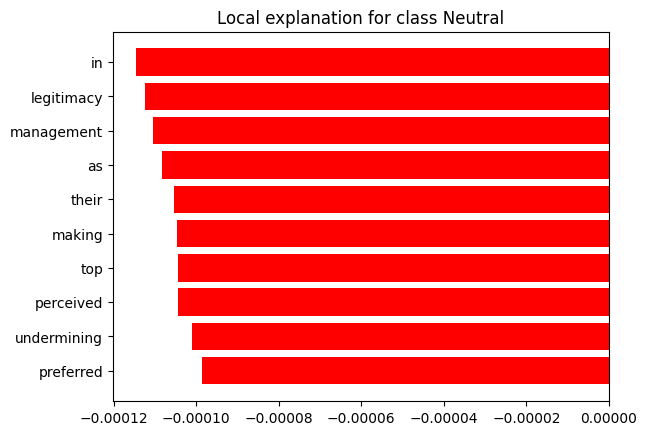

Premise: Regulatory intervention risks generating internal conflict and divisions rather than promoting inclusion.

Predizione: Against
Spiegazione:
[(np.str_('risks'), -0.00011840305099263443), (np.str_('than'), -0.00011758024698587295), (np.str_('generating'), -0.00011295781685193568), (np.str_('conflict'), -0.00011277203302758774), (np.str_('and'), -0.00011063083244800962), (np.str_('Regulatory'), -0.00010914665475782942), (np.str_('divisions'), -0.00010663473420664956), (np.str_('promoting'), -0.00010601308565416746), (np.str_('internal'), -0.00010307473721325402), (np.str_('inclusion'), -9.919071618264003e-05)]


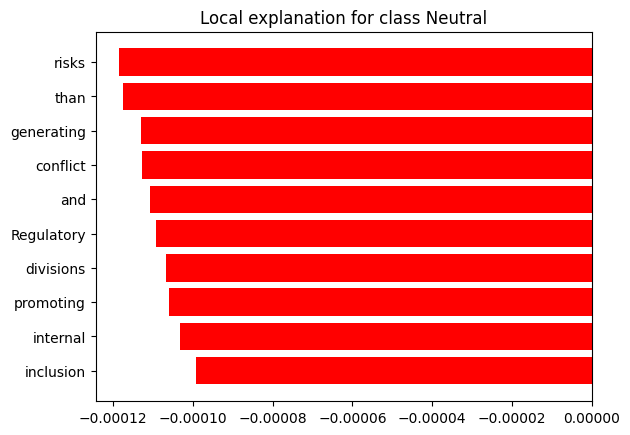

Premise: The European initiative encourages greater transparency in board selection processes.

Predizione: Supportive
Spiegazione:
[(np.str_('selection'), -0.00013561624943602923), (np.str_('Premise'), -0.0001306474975009626), (np.str_('in'), -0.00012721913528044307), (np.str_('The'), -0.00012495423638194723), (np.str_('board'), -0.00012299337340462217), (np.str_('European'), -0.00012238476941372033), (np.str_('initiative'), -0.00012047491885998563), (np.str_('encourages'), -0.00011976227971071524), (np.str_('processes'), -0.00011793991551244988), (np.str_('greater'), -0.00011638800036767506)]


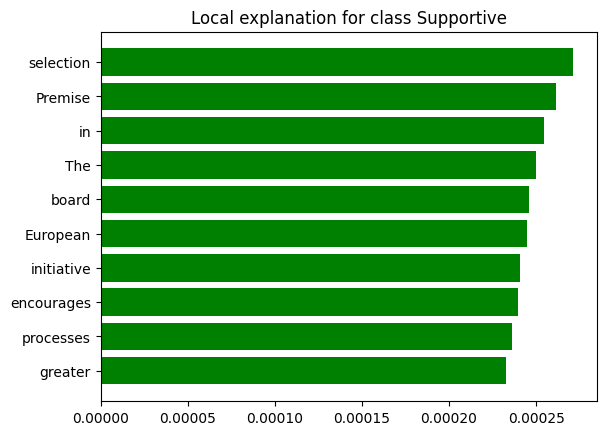

Premise: The Gender Balance Directive is based on affirmative action principles, allowing the underrepresented sex to be given priority when candidates with equivalent qualifications are available.

Predizione: Supportive
Spiegazione:
[(np.str_('with'), -8.93970097639901e-05), (np.str_('Gender'), -8.913481561417691e-05), (np.str_('sex'), -8.780556706454231e-05), (np.str_('underrepresented'), -8.778006252806262e-05), (np.str_('Directive'), -8.682120988841905e-05), (np.str_('given'), -8.570800964724957e-05), (np.str_('Premise'), -8.444835933162014e-05), (np.str_('priority'), -8.162946530083131e-05), (np.str_('candidates'), -8.137515265966196e-05), (np.str_('action'), -7.786879962377883e-05)]


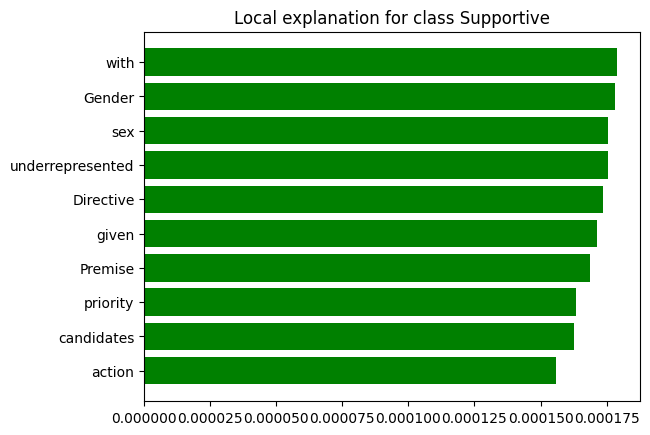

In [102]:
# Scegli un modello da spiegare (es. pred_mod1)
MODEL_COL = "Label_directive"
DF = df_text_cl
LABEL_TRUE = "Supportive"

# Definisci le classi
class_names = DF["Gold_Label"].unique().tolist()

# LIME ha bisogno di una funzione predict_proba-like.
# Nel tuo caso hai solo label già predette: puoi simulare una funzione
# che restituisce probabilità "one-hot".
def fake_predict_proba(texts):
    # texts è una lista di stringhe
    results = []
    for t in texts:
        # Trova la riga corrispondente nel DataFrame
        idx_match = DF[DF["Sentence"] == t.replace("Premise: ", "")].index
        if len(idx_match) == 0:
            # Se non trova, restituisce probabilità uniforme
            results.append([1/len(class_names)]*len(class_names))
        else:
            pred_label = DF.loc[idx_match[0], MODEL_COL]
            probs = [1.0 if c == pred_label else 0.0 for c in class_names]
            results.append(probs)
    return np.array(results)

# Definisci come input il testo da spiegare

for idx in range(0,len(DF)):
    premise = DF.iloc[idx]["Sentence"]
    # hypothesis = DF.iloc[idx]["hypothesis"]
    text = f"Premise: {premise}"
    # \nHypothesis: {hypothesis}"
    print(text+'\n')

    explainer = LimeTextExplainer(class_names=class_names)
    exp = explainer.explain_instance(text, fake_predict_proba, num_features=10, labels=(0,1))

    # Mostra spiegazione in console
    print("Predizione:", DF.iloc[idx][MODEL_COL])
    print("Spiegazione:")
    print(exp.as_list())

    # Visualizzazione grafica
    fig = exp.as_pyplot_figure(0 if DF.iloc[idx][MODEL_COL] == LABEL_TRUE else 1)
    plt.show()


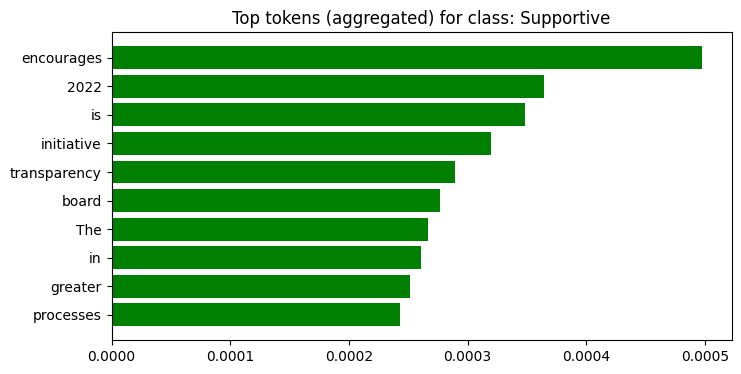

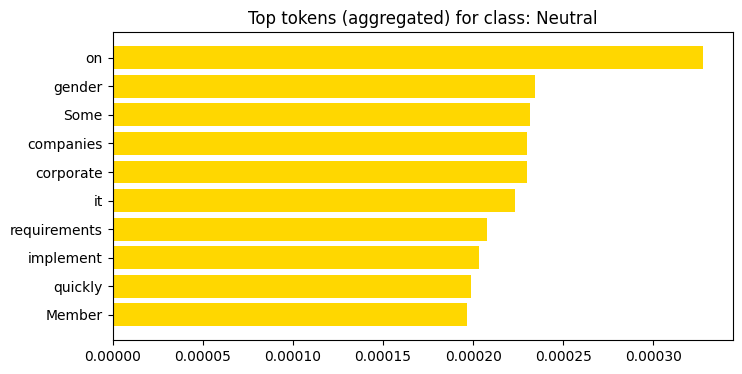

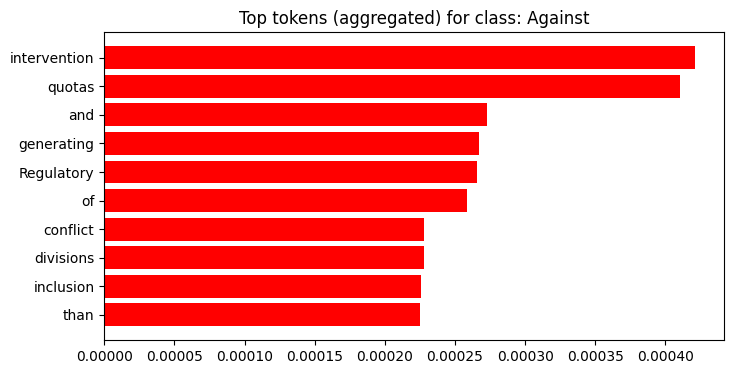

In [103]:
# Scegli un modello da spiegare
MODEL_COL = "Label_legends"
DF = df_text_cl
class_names = DF["Gold_Label"].unique().tolist()

# Fake predict_proba (come nel tuo codice)
def fake_predict_proba(texts):
    results = []
    for t in texts:
        idx_match = DF[DF["Sentence"] == t].index
        if len(idx_match) == 0:
            results.append([1/len(class_names)]*len(class_names))
        else:
            pred_label = DF.loc[idx_match[0], MODEL_COL]
            probs = [1.0 if c == pred_label else 0.0 for c in class_names]
            results.append(probs)
    return np.array(results)

# Inizializza LIME
explainer = LimeTextExplainer(class_names=class_names)

# Dizionario aggregato
agg_weights = {label: defaultdict(float) for label in class_names}

# Cicla sulle frasi e accumula i pesi
for idx in range(len(DF)):
    text = f"{DF.iloc[idx]['Sentence']}"
    exp = explainer.explain_instance(text, fake_predict_proba, num_features=10, labels=range(len(class_names)))

    for i, label in enumerate(class_names):
        for word, weight in exp.as_list(label=i):
            agg_weights[label][word] += weight

color_label = {'Supportive': 'green', 'Neutral' : 'gold', 'Against': 'red'}
# Crea un grafico per ciascuna classe
for label in class_names:
    df_plot = pd.DataFrame(agg_weights[label].items(), columns=["word", "weight"])
    df_plot = df_plot.sort_values("weight", ascending=False).head(10)

    plt.figure(figsize=(8,4))
    plt.barh(df_plot["word"], df_plot["weight"], color=color_label[label])
    plt.title(f"Top tokens (aggregated) for class: {label}")
    plt.gca().invert_yaxis()
    plt.show()

In [104]:
def make_fake_predict_proba(df, model_col, input_col, class_names):
    """
    Restituisce una funzione predict_proba-like per LIME.
    Usa le label predette dal dataset salvato su CSV.
    """
    def fake_predict_proba(texts):
        results = []
        for t in texts:
            idx_match = df[df[input_col] == t].index
            if len(idx_match) == 0:
                # fallback: probabilità uniforme
                results.append([1/len(class_names)]*len(class_names))
            else:
                pred = df.loc[idx_match[0], model_col]
                probs = [1.0 if c == pred else 0.0 for c in class_names]
                results.append(probs)
        return np.array(results)
    return fake_predict_proba


def build_input(row, task):
    if task == "Text Classification":
        return f"Premise: {row['Sentence']}"
    else:
        raise ValueError(f"Task {task} non supportato.")


TASK_CLASSES = {
    "Text Classification": ["Supportive", "Neutral", "Against"]
}


def explain_task(df, task, model_col="Label", max_examples=3):
    """
    df: dataframe con dati del task
    task: "COPA", "RTE", "MultiRC" o "WiC"
    model_col: colonna con le label predette dal modello
    """
    # Costruisci input colonna
    df = df.copy()
    df["input_text"] = df.apply(lambda row: build_input(row, task), axis=1)

    # Definisci classi
    class_names = TASK_CLASSES[task]

    # Funzione predict_proba
    fake_predict_proba = make_fake_predict_proba(df, model_col, "input_text", class_names)

    # Spiegatore
    explainer = LimeTextExplainer(class_names=class_names)

    for idx in range(min(max_examples, len(df))):
        text = df.iloc[idx]["input_text"]

        exp = explainer.explain_instance(text, fake_predict_proba, num_features=10, labels=[0,1])

        print("="*40)
        print(f"Task: {task} - Esempio {idx}")
        print("Input:", text)
        print("Predizione:", df.iloc[idx][model_col])
        print("Spiegazione (as list):")
        print(exp.as_list())
        
        # Visualizza grafico per la label predetta
        label_index = class_names.index(df.iloc[idx][model_col])
        fig = exp.as_pyplot_figure(label_index)
        plt.show()


In [105]:
def explain_LIME_aggregated(df, model_cols, task, max_examples=5):
    """
    Crea 2 grafici complessivi (uno per entailment e uno per not_entailment),
    aggregando i risultati di più modelli (con barre affiancate).
    
    df : pandas.DataFrame con i dati
    model_cols : lista con i nomi delle colonne dei modelli, es. ["no_ft","directive","legends"]
    max_examples : quanti esempi usare per calcolare l'aggregazione
    """

    # Legal Entailment ha stessa struttura RTE
    class_names = TASK_CLASSES[task]  # ["entailment", "not_entailment"]

    # Costruisci input text
    df = df.copy()
    df["input_text"] = df.apply(lambda row: build_input(row, task), axis=1)

    explainer = LimeTextExplainer(class_names=class_names)

    # Contenitori: {classe: {modello: {feat: peso medio}}}
    agg_exp = {c: {m: {} for m in model_cols} for c in class_names}

    # Itera su esempi
    for idx in range(min(max_examples, len(df))):
        text = df.iloc[idx]["input_text"]

        for model_col in model_cols:
            fake_predict_proba = make_fake_predict_proba(df, model_col, "input_text", class_names)
            exp = explainer.explain_instance(text, fake_predict_proba, num_features=10, labels=[0,1,2])

            pred_label = df.iloc[idx][model_col]

            for label in class_names:
                for feat, weight in exp.as_list(label=class_names.index(label)):
                    agg_exp[label][model_col][feat] = agg_exp[label][model_col].get(feat, 0) + weight

    # Media dei pesi
    for label in class_names:
        for model_col in model_cols:
            for feat in agg_exp[label][model_col]:
                agg_exp[label][model_col][feat] /= max_examples

    # ---- Visualizzazione finale: 2 grafici aggregati ----
    colors = {model_cols[0]:"#1f77b4", model_cols[1]:"#ff7f0e", model_cols[2]:"#2ca02c"}

    for label in class_names:
        # Trova top 10 feature globali (sommando modelli)
        feat_scores = {}
        for model_col in model_cols:
            for feat, w in agg_exp[label][model_col].items():
                feat_scores[feat] = feat_scores.get(feat, 0) + abs(w)
        top_feats = sorted(feat_scores.keys(), key=lambda f: feat_scores[f], reverse=True)[:10]

        x = np.arange(len(top_feats))
        width = 0.25

        plt.figure(figsize=(10,6))
        for i, model_col in enumerate(model_cols):
            vals = [agg_exp[label][model_col].get(f, 0) for f in top_feats]
            plt.bar(x + i*width, vals, width, label=model_col, color=colors[model_col])

        plt.xticks(x + width, top_feats, rotation=45, ha="right")
        plt.ylabel("Peso medio")
        plt.title(f"Importanza media feature ({label})")
        plt.legend()
        plt.tight_layout()
        plt.show()


In [106]:
df_text_cl_error = df_text_cl.iloc[[1,8]]

In [115]:
df_text_cl_error

,Sentence,Gold_Label,Label_no_ft,Label_directive,Label_legends
1,Some companies may find it difficult to quickl...,Neutral,Against,Neutral,Neutral
8,The Gender Balance Directive is based on affir...,Neutral,Neutral,Supportive,Supportive


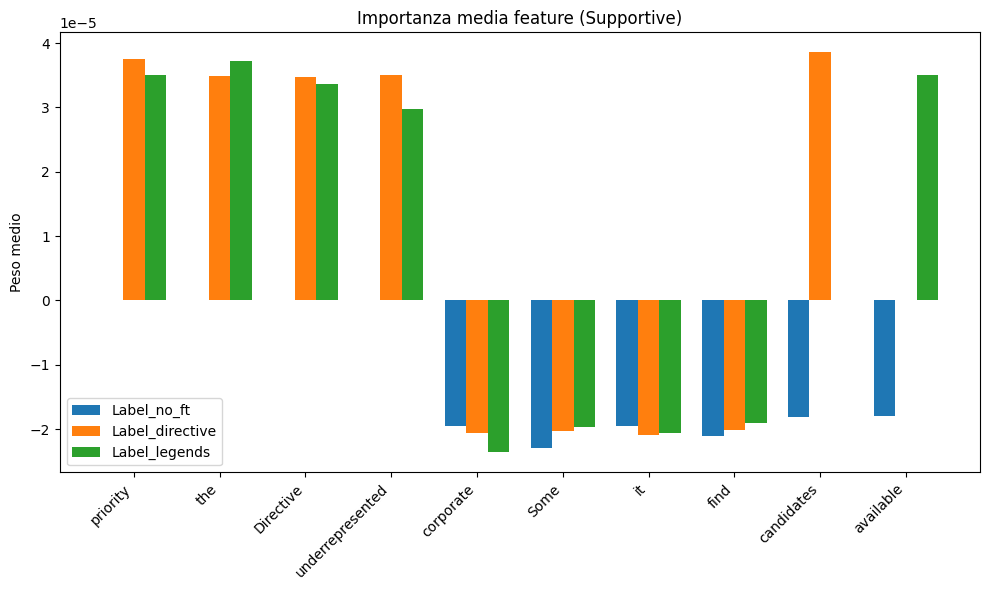

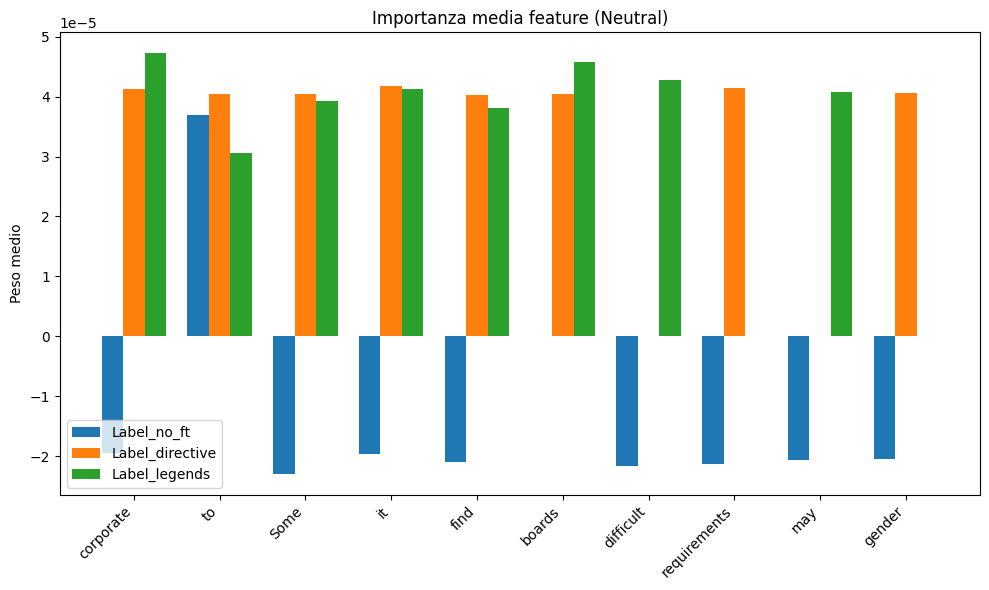

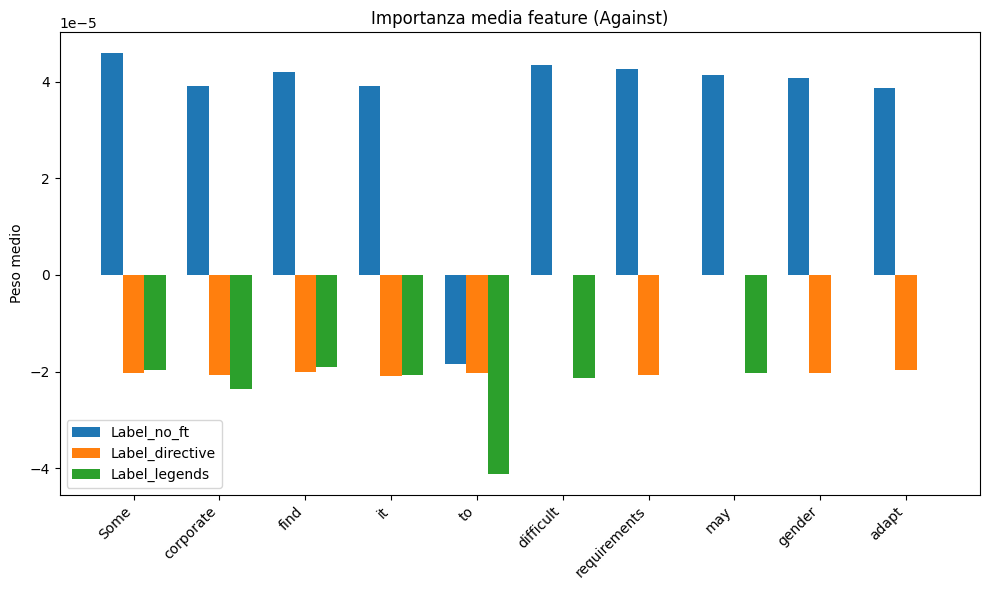

In [108]:
explain_LIME_aggregated(df_text_cl_error, ["Label_no_ft", "Label_directive", "Label_legends"], "Text Classification")